In [1]:
import timeseries_acquire as tsa
import timeseries_prepare as tsp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# acquire dataframes
items_df = tsa.acquire_df('items')
stores_df = tsa.acquire_df('stores')
sales_df = tsa.acquire_df('sales')

File already exists
File already exists
File already exists


In [3]:
# combine the dataframes
df = tsa.combine_data(sales_df, items_df, stores_df)
df

,sale_amount,sale_date,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_id,,,,,,,,,,,
1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
5,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
...,...,...,...,...,...,...,...,...,...,...,...
912996,63.0,"Wed, 27 Dec 2017 00:00:00 GMT",Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231
912997,59.0,"Thu, 28 Dec 2017 00:00:00 GMT",Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231
912998,74.0,"Fri, 29 Dec 2017 00:00:00 GMT",Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231


In [4]:
# Convert date column to datetime format.
df['sale_date'] = pd.to_datetime(df['sale_date'])

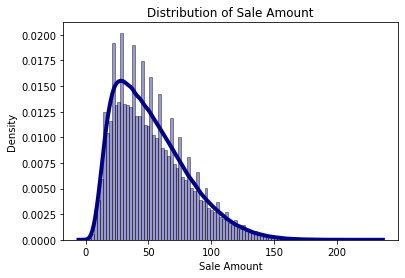

In [5]:
# Plot the distribution of sale_amount and item_price.
sns.distplot(df['sale_amount'], hist=True, kde=True, bins=100, color='darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.title('Distribution of Sale Amount')
plt.xlabel('Sale Amount')
plt.ylabel('Density')
plt.show()

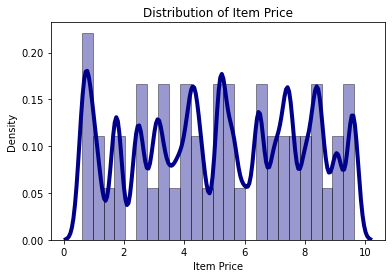

In [6]:
sns.distplot(df['item_price'], hist=True, kde=True, bins=25, color='darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.title('Distribution of Item Price')
plt.xlabel('Item Price')
plt.ylabel('Density')
plt.show()

In [7]:
# Set the index to be the datetime variable.
df.set_index('sale_date', inplace=True)

In [8]:
# Add a 'month' and 'day of week' column to your dataframe.
df['month'] = df.index.month_name()
df['day_of_week'] = df.index.day_name()

In [9]:
df

,sale_amount,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday
2013-01-02 00:00:00+00:00,11.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Wednesday
2013-01-03 00:00:00+00:00,14.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Thursday
2013-01-04 00:00:00+00:00,13.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Friday
2013-01-05 00:00:00+00:00,10.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27 00:00:00+00:00,63.0,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,December,Wednesday
2017-12-28 00:00:00+00:00,59.0,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,December,Thursday
2017-12-29 00:00:00+00:00,74.0,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,December,Friday


In [10]:
# Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
df['sales_total'] = df['sale_amount'] * df['item_price']

In [11]:
def trinity_prep(df):
    ''' This function takes in the trinity(sale, items, stores) dataframe and returns a dataframe with the following changes: 
    'sale_date' column is converted to datetime format, 'month' and 'day_of_week' columns are added, and 'sales_total' column is added.
    '''
    df['sale_date'] = pd.to_datetime(df['sale_date'])
    df.set_index('sale_date', inplace=True)
    df['month'] = df.index.month_name()
    df['day_of_week'] = df.index.day_name() 
    df['sales_total'] = df['sale_amount'] * df['item_price']
    return df
    

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

1. Convert date column to datetime format.
2. Plot the distribution of each of your variables.
3. Set the index to be the datetime variable.
4. Add a month and a year column to your dataframe.
5. Fill any missing values.
6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [12]:
# Acquire the opsd_germany_daily dataframe.
opsd = tsa.acquire_opsd_germany_daily()
opsd

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


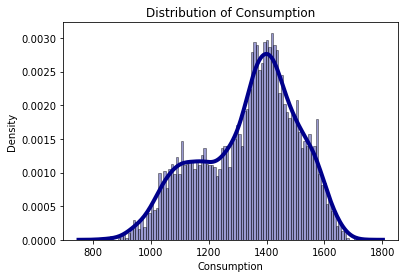

In [13]:
# Plot the distribution of each of your variables in the opsd_germany_daily dataframe.
sns.distplot(opsd['Consumption'], hist=True, kde=True, bins=100, color='darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.title('Distribution of Consumption')
plt.xlabel('Consumption')
plt.ylabel('Density')
plt.show()

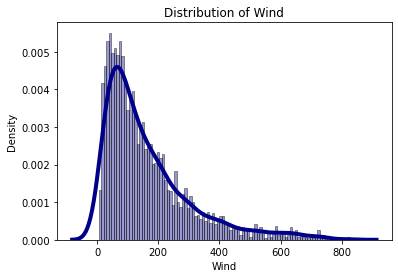

In [14]:
sns.distplot(opsd['Wind'], hist=True, kde=True, bins=100, color='darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.title('Distribution of Wind')
plt.xlabel('Wind')
plt.ylabel('Density')
plt.show()

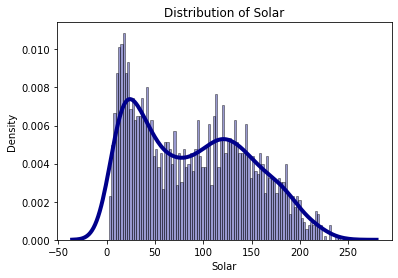

In [15]:
sns.distplot(opsd['Solar'], hist=True, kde=True, bins=100, color='darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.title('Distribution of Solar')
plt.xlabel('Solar')
plt.ylabel('Density')
plt.show()

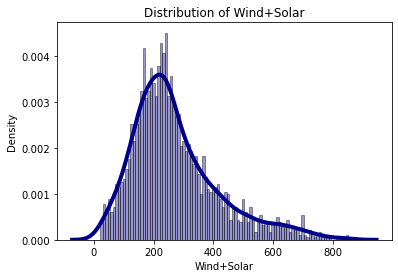

In [16]:
sns.distplot(opsd['Wind+Solar'], hist=True, kde=True, bins=100, color='darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.title('Distribution of Wind+Solar')
plt.xlabel('Wind+Solar')
plt.ylabel('Density')
plt.show()

In [17]:
# turn the index into a column  
opsd.reset_index(inplace=True)

In [18]:
# Set the index to be the datetime variable.
opsd['Date'] = pd.to_datetime(opsd['Date'])
opsd.set_index('Date', inplace=True)

In [19]:
# Add a month and a year column to your dataframe.
opsd['month'] = opsd.index.month_name()
opsd['year'] = opsd.index.year

In [20]:
# Fill any missing values.
opsd['Wind'].fillna(0, inplace=True)
opsd['Solar'].fillna(0, inplace=True)
opsd['Wind+Solar'].fillna(0, inplace=True)

In [21]:
# check for missing values
opsd.isnull().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64

In [22]:
opsd.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


In [23]:
# create a function for opsd_prep
def opsd_prep(df):
    ''' This function takes in the opsd_germany_daily dataframe and returns a dataframe with the following changes: 
    'Date' column is converted to datetime format, 'month' and 'year' columns are added, and 'Wind+Solar' column is added.
    '''
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df['month'] = df.index.month_name()
    df['year'] = df.index.year
    df['Wind+Solar'] = df['Wind'] + df['Solar']
    return df

In [24]:
# check function
opsd_check = tsa.acquire_opsd_germany_daily()

In [25]:
opsd_check = tsp.opsd_prep(opsd_check)